<a href="https://colab.research.google.com/github/anirudh-g/Msc-Data-science/blob/master/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

In [2]:
!pip install torch==1.4

In [3]:
!pip install torchvision==0.5.0

In [4]:
from detecto import core, utils, visualize
import torch
import matplotlib.pyplot as plt
from detecto.utils import read_image

In [5]:
print(torch.cuda.is_available())

True


In [6]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/objection detection')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls

images	labels.csv  Train  Validation  xml


In [8]:
from detecto.utils import xml_to_csv

#xml_to_csv('xml/', 'labels.csv') 
dataset = core.Dataset('Train/')

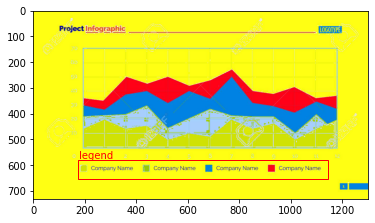

In [9]:
from detecto.visualize import show_labeled_image

image, targets = dataset[25]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [10]:
#dataset = core.Dataset('Annotations/', 'Train/')
#image, target = dataset[0]
#print(image, target)

In [11]:
model = core.Model(['title', 'legend', 'axis label'])
val_dataset = core.Dataset('Validation/')
model.fit(dataset, val_dataset, verbose=True, learning_rate=0.001)

Epoch 1 of 10
Loss: 0.2127286812724316
Epoch 2 of 10
Loss: 0.21375800454861496
Epoch 3 of 10
Loss: 0.18914486575004172
Epoch 4 of 10
Loss: 0.1794277789351875
Epoch 5 of 10
Loss: 0.17856902026966825
Epoch 6 of 10
Loss: 0.1771834639143454
Epoch 7 of 10
Loss: 0.17911313958976366
Epoch 8 of 10
Loss: 0.17919151747777853
Epoch 9 of 10
Loss: 0.1799741838994908
Epoch 10 of 10
Loss: 0.18186856801175091


[0.2127286812724316,
 0.21375800454861496,
 0.18914486575004172,
 0.1794277789351875,
 0.17856902026966825,
 0.1771834639143454,
 0.17911313958976366,
 0.17919151747777853,
 0.1799741838994908,
 0.18186856801175091]

In [28]:
from google.colab import files
uploaded = files.upload()

Saving barchart.jpg to barchart.jpg


In [29]:
image2 = utils.read_image('barchart.jpg')

In [30]:
predictions = model.predict_top(image2)
labels, boxes, scores = predictions

In [31]:
print(labels)

['axis label', 'legend', 'title']


In [32]:
print(boxes)

tensor([[279.6343, 338.1399, 347.8630, 374.8707],
        [106.7036, 378.9360, 477.1375, 416.3872],
        [128.3258,  16.0450, 487.4080,  52.0649]])


In [33]:
print(scores)

tensor([0.4781, 0.4098, 0.7216])


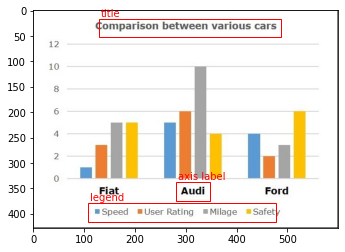

In [34]:
visualize.show_labeled_image(image2, boxes, labels)